In [34]:
import cv2 as cv
from skimage import io, color
from skimage.segmentation import slic, mark_boundaries
from skimage.measure import regionprops
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
import numpy as np
import pickle

In [67]:
rgb = io.imread("brego.webp")
lab = color.rgb2lab(rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


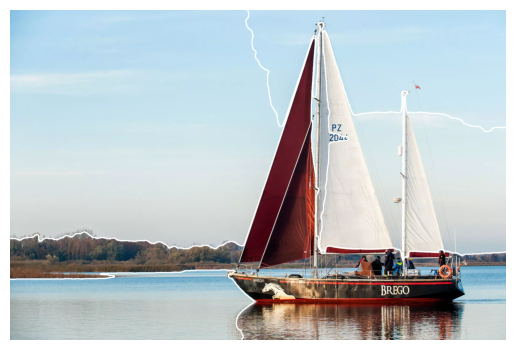

In [68]:
# image = img_as_float(rgb)

segments = slic(rgb, n_segments = 5, convert2lab=True, sigma = 5, enforce_connectivity=True, compactness=10)
fig = plt.figure("Superpixels -- %d segments" % (1000))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(rgb, segments, color=(255, 255, 255), outline_color=(255, 255, 255), mode='thick'))
plt.axis("off")

plt.show()

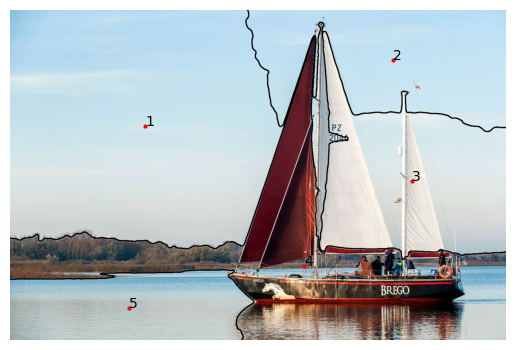

In [72]:
fig = plt.figure("Superpixels -- %d segments" % (1000))
ax = fig.add_subplot(1, 1, 1)
centers = {}
regions = regionprops(segments, intensity_image=rgb)
for props in regions:
    cy, cx = props.centroid
    centers[props.label-1] = (cx, cy)
    ax.plot(cx, cy, 'ro', markersize=2)
    ax.text(cx, cy, props.label)
    

ax.imshow(mark_boundaries(rgb, segments, color=(0, 0, 0), outline_color=(0, 0, 0), mode='thick'))
plt.axis("off")

plt.savefig("fig1")
plt.show()
with open ("data.pkl", "wb") as f:
    pickle.dump({"img": rgb, "superpixels": segments, "centers": centers}, f)

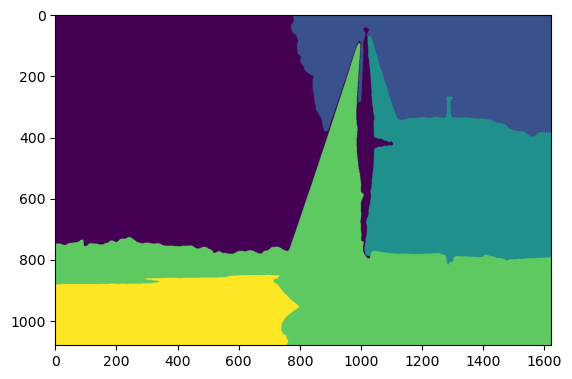

In [70]:
plt.imshow(segments)

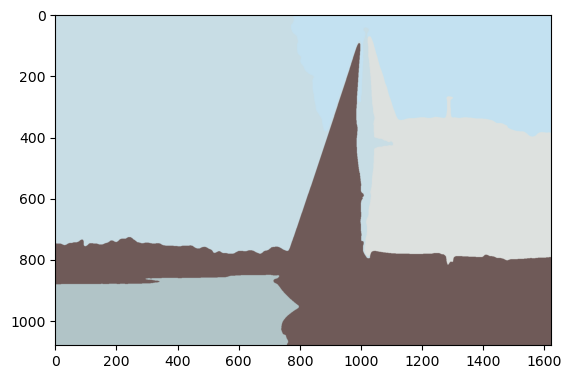

In [71]:
new_image = np.zeros_like(rgb)
for i in np.unique(segments):
    mask = segments == i
    mean_color = np.mean(rgb[mask], axis=0)  # average R, G, B separately
    new_image[mask] = mean_color

plt.imshow(new_image)

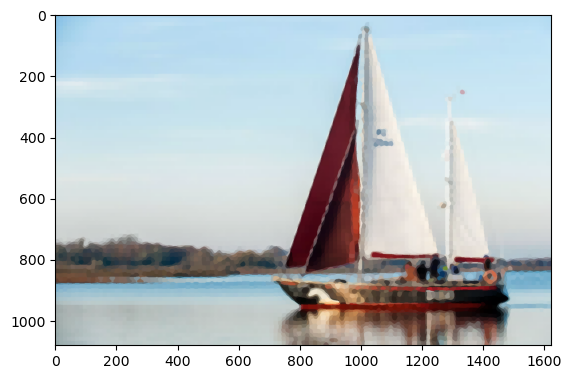

In [33]:
out1 = color.label2rgb(segments, rgb, kind='avg', bg_label=0)
plt.imshow(out1)

In [30]:
rgb.shape[0]*rgb.shape[1]

1752840